In [27]:
from core.audio_io import load_audio, normalize, play_audio
from core.mixing import mix_with_snr
from enhancement.spectral_subtraction import spectral_subtraction
from enhancement.wiener_static import wiener_filter_static
from evaluation.benchmarking import evaluate_method, print_results
from core.visualization import plot_waveforms, plot_spectrogram
from enhancement.adaptive import DualChannelSimulator, AdaptiveNLMSFilter

In [28]:
clean, fs = load_audio("data/clean/clean_speech.wav")
noise, _ = load_audio("data/noise/traffic.wav")
simulator = DualChannelSimulator(room_complexity=50)
d_primary, x_reference = simulator.simulate(clean, noise, snr_db=5, leakage_db=-20)
nlms = AdaptiveNLMSFilter(filter_order=256, learning_rate=0.1)
y_cleaned = nlms.process(d_primary, x_reference, auto_sync=True)

In [29]:
#Result Audio Files

print("--- Input: Noisy Primary Mic (Simulated) ---")
play_audio(d_primary, fs)

--- Input: Noisy Primary Mic (Simulated) ---


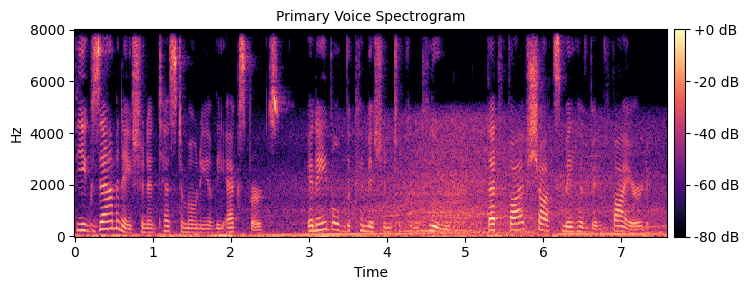

In [32]:
plot_spectrogram(d_primary, fs, "Primary Voice Spectrogram")

In [30]:

print("--- Input: Noisy referance Mic (Simulated) ---")
play_audio(x_reference, fs)

--- Input: Noisy referance Mic (Simulated) ---


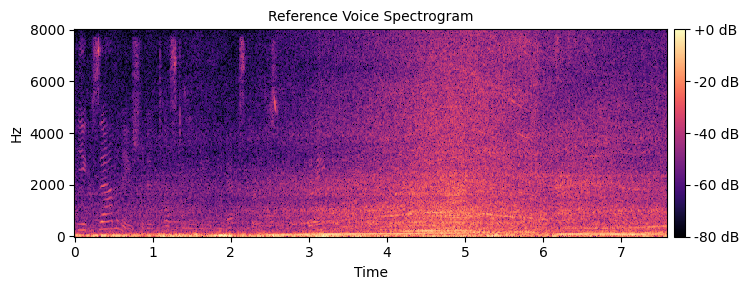

In [33]:
plot_spectrogram(x_reference, fs, "Reference Voice Spectrogram")

In [31]:
print("--- Output: Adaptive NLMS Result ---")
play_audio(normalize(y_cleaned), fs)

--- Output: Adaptive NLMS Result ---


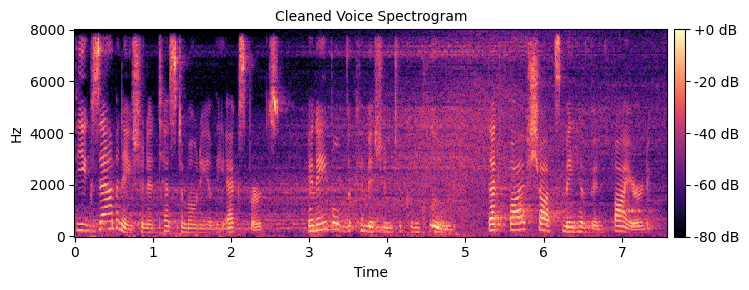

In [35]:
res_ss = evaluate_method(clean,d_primary ,y_cleaned)
print("Spectral Subtraction")
print_results(res_ss)

Spectral Subtraction
SNR_in (dB)           : 5.942
SNR_out (dB)          : -2.235
SNR_improvement (dB)  : -8.177
Segmental_SNR (dB)    : -6.135
MSE                   : 0.015
LSD                   : 18.903
